# importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# &&  Data Cleaning And Imputation  &&

In [2]:
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\Titanic-Train-Data.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Check MissingValues 
Imputation On Embarked And Age Columns  

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [8]:
df['Embarked'].fillna(df['Embarked'],inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

#  Title Extraction  

In [11]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

In [12]:
df['Initial']

1       Mrs
3       Mrs
6        Mr
10     Miss
11     Miss
       ... 
871     Mrs
872      Mr
879     Mrs
887    Miss
889      Mr
Name: Initial, Length: 202, dtype: object

In [13]:
df['Initial'].replace (['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [14]:
df.groupby('Initial')['Age'].mean()

Initial
Master     3.988571
Miss      27.589760
Mr        39.743894
Mrs       37.388791
Other     56.000000
Name: Age, dtype: float64

In [15]:
df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46


In [16]:
df.Age.isnull().any()

False

#  Ticket Frist Letter  

In [17]:
df["Ticket"].head()

1     PC 17599
3       113803
6        17463
10     PP 9549
11      113783
Name: Ticket, dtype: object

In [18]:
ticket =[]
for i in list(df.Ticket):
    if not i.isdigit():
        ticket.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        ticket.append("0")
df["Ticket"]=ticket

In [19]:
df["Ticket"].head()

1     PC
3      0
6      0
10    PP
11     0
Name: Ticket, dtype: object

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial'],
      dtype='object')

#   Family Size  

In [21]:
df["Fsize"]=df["SibSp"]+df["Parch"]+1

In [22]:
df["family_size"]=[1 if i < 5 else 0 for i in df["Fsize"]]

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Fsize,family_size
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,C,Mrs,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,0,53.1000,C123,S,Mrs,2,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,0,51.8625,E46,S,Mr,1,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP,16.7000,G6,S,Miss,3,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,0,26.5500,C103,S,Miss,1,1


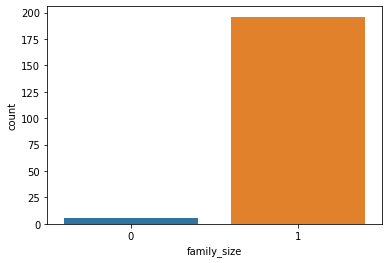

In [24]:
sns.countplot(x="family_size", data= df)
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


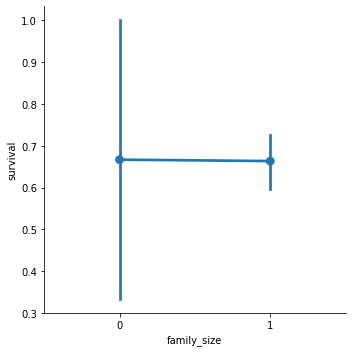

In [25]:
b =sns.factorplot(x = "family_size", y="Survived", data = df)
b.set_ylabels("survival")
plt.show()

# Encoding Sex Column

In [26]:
df=pd.get_dummies(df,columns=["Sex"])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Fsize,family_size,Sex_female,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC,71.2833,C85,C,Mrs,2,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,0,53.1000,C123,S,Mrs,2,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,0,51.8625,E46,S,Mr,1,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP,16.7000,G6,S,Miss,3,1,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,0,26.5500,C103,S,Miss,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,0,52.5542,D35,S,Mrs,3,1,1,0
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,0,5.0000,B51 B53 B55,S,Mr,1,1,0,1
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,0,83.1583,C50,C,Mrs,2,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,0,30.0000,B42,S,Miss,1,1,1,0


In [27]:
df["Sex"]=df['Sex_male']

In [28]:
df.drop(labels=['Sex_male','Sex_female'],axis=1,inplace=True)

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Fsize',
       'family_size', 'Sex'],
      dtype='object')

# Visualization

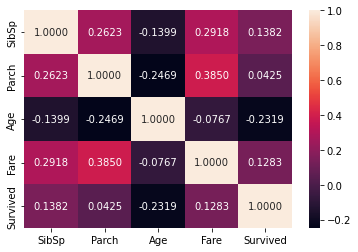

In [30]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(df[list1].corr(), annot = True, fmt = ".4f")
plt.show()

# Sex Vs. Age using Bar-graph

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


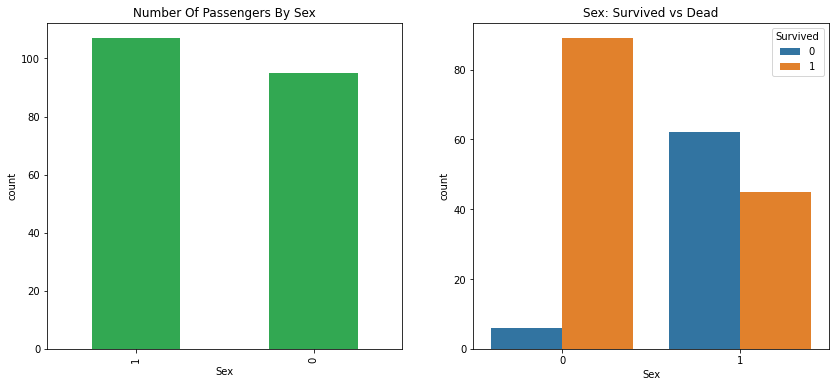

In [31]:
fig ,ax=plt.subplots(1,2,figsize=(14,6))
df['Sex'].value_counts().plot.bar(color="#32a852",ax=ax[0], xlabel="Sex")
ax[0].set_title('Number Of Passengers By Sex')
ax[0].set_ylabel('count')
sns.countplot('Sex', hue='Survived', data=df, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()


# Sex Vs. Age Vs. Pclass using Violin-plot

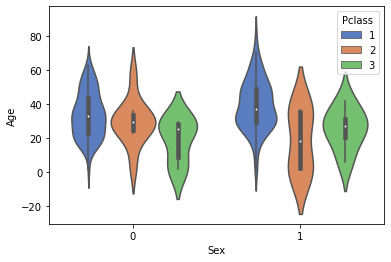

In [32]:
ax = sns.violinplot(x=df['Sex'], y=df['Age'], hue=df['Pclass'],
                    data=df,palette="muted" )

<AxesSubplot:xlabel='Survived', ylabel='Age'>

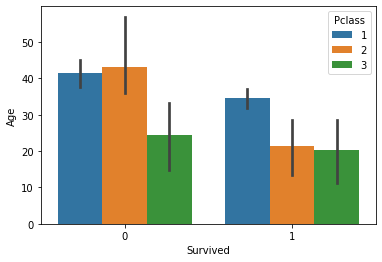

In [33]:
sns.barplot(x="Survived", y="Age", hue="Pclass", data=df)

In [34]:
Titanic_data=df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fsize']]


In [35]:
Titanic_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fsize
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.663366,1.198020,0.529703,35.112392,0.445545,0.440594,1.886139
std,0.473732,0.528205,0.500357,14.988475,0.630490,0.732294,1.084447
min,0.000000,1.000000,0.000000,0.920000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,33.500000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,1.000000,46.750000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,4.000000,6.000000


# saving to pickel

In [36]:
with open('Titanic_data.pkl', 'wb') as f:
    pickle.dump(df, f)

In [37]:
titanic_File=pickle.load(open('Titanic_data.pkl','rb'))

In [38]:
x=titanic_File[['Pclass','Sex','Age', 'SibSp', 'Parch', 'Fsize']]
y=titanic_File[['Survived']]

In [39]:
x

,Pclass,Sex,Age,SibSp,Parch,Fsize
1,1,0,38.0,1,0,2
3,1,0,35.0,1,0,2
6,1,1,54.0,0,0,1
10,3,0,4.0,1,1,3
11,1,0,58.0,0,0,1
...,...,...,...,...,...,...
871,1,0,47.0,1,1,3
872,1,1,33.0,0,0,1
879,1,0,56.0,0,1,2
887,1,0,19.0,0,0,1


In [40]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


# Modeling

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [43]:
logisticr=LogisticRegression()

In [44]:
logisticr.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [45]:
predict=logisticr.predict(x_test)  
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

# testing the model

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
pd.DataFrame(confusion_matrix(y_test,predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,14,5
Actual Yes,7,35


In [48]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70        19
           1       0.88      0.83      0.85        42

    accuracy                           0.80        61
   macro avg       0.77      0.79      0.78        61
weighted avg       0.81      0.80      0.81        61



In [49]:
with open('Train_Test.pkl', 'wb') as f:
    pickle.dump(df, f)